In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### `Divide data into x and y`

In [6]:
X = df.iloc[:,0].values # first column R&D Spend
Y = df.iloc[:,-1].values # last column Profit
# iloc is used to select rows and columns by their integer position 

In [7]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [8]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

### `TRAIN TEST SPLIT`

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

- This function splits the data into training and testing sets. 
- The test_size parameter is the proportion of the data to include in the test split. 
- It defaults to 0.25, or 25%, if you omit the parameter.

In [11]:
len(X_train)

40

In [12]:
len(X_test)

10

In [14]:
X_test

array([ 61136.38,  28754.33,    542.05,  64664.71,  23640.93,  44069.95,
       134615.46,  93863.75, 120542.52,  86419.7 ])

In [15]:
Y_test

array([ 97483.56,  78239.91,  35673.41, 107404.34,  71498.49,  89949.14,
       156122.51, 141585.52, 152211.77, 122776.86])

`reshape(-1, 1)`	Convert a 1D array into a 2D column vector

**Why?**	To make input compatible with ML models expecting 2D shape

In [ ]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1) 

In [17]:
X_test

array([[ 61136.38],
       [ 28754.33],
       [   542.05],
       [ 64664.71],
       [ 23640.93],
       [ 44069.95],
       [134615.46],
       [ 93863.75],
       [120542.52],
       [ 86419.7 ]])

### `Create Linear Regression Model`

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Predictions
y_pred = regressor.predict(X_test)

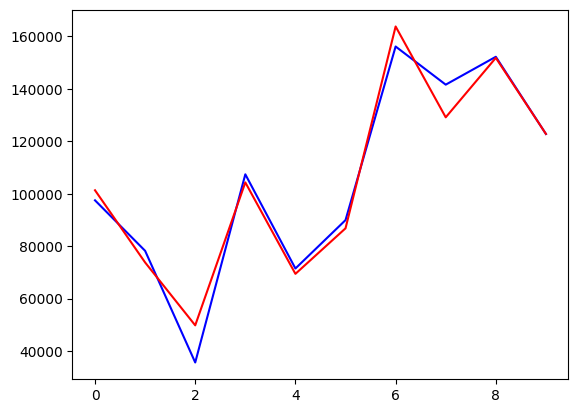

In [21]:
plt.plot(Y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

# `Regression Matrices`

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Mean Absolute Error
mae = mean_absolute_error(y_pred, Y_test)
print(mae)

5121.903477126436


In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_pred, Y_test)
print(mse)

47189838.76289088


In [ ]:
# Root Mean Square Error 
print(np.sqrt(mse)) # rmse

6869.486062500664


In [26]:
# R2 Score
r2 = r2_score(y_pred,Y_test)
print(r2)

0.9612141156232309


In [ ]:
# Adjusted-R-squared

n = X_test.shape[0] #rows
K = X_test.shape[1] #columns

adjusted_r2 = 1 - (1-r2)*(n-1)/(n-1-K)

print(adjusted_r2)

0.9563658800761348
